In [1]:
import numpy as np
import pandas as pd

import nltk
import spacy

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### This notebook covers the basics of starting with text data and implementing machine learning algorithms that take that data as input and output predictions. 

#### Using scikitlearn, we will walk through:
- Naive Bayes Classifier
- Logistic Regression 

## Naive Bayes Classifier

Generative model: Naive Bayes models the joint distribution of the feature X and target Y, and then predicts the posterior probability given as P(y|x)


The naive bayes classifier uses Baye's rule to assign labels to input data, with the output as the label with the highest probability for a number of input features.


### Steps:
- Loading dataset
- Visualization
- Preprocessing
- Model creation
- Evaluation

#### Loading the dataset

In [2]:
df_sms = pd.read_csv('data/spam.csv',encoding='latin-1')
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df_sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [4]:
df_sms['length'] = df_sms['sms'].apply(len)

#### Visualization

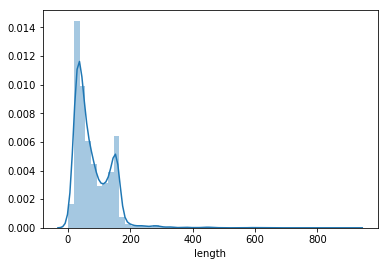

In [5]:
sns.distplot(df_sms['length'])
plt.show()

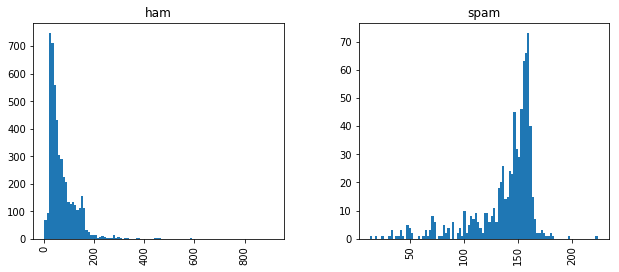

In [6]:
df_sms.hist(column='length', by='label', bins=100,figsize=(10,4))
plt.show()

In [7]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
df_sms.head()

,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Scikitlearn Count Vectorizer for Preprocessing

Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.


#### Steps:
- Normalize to lower case
- Remove punctuation
- Tokenize
- Stop word removal
- Bag-of-words representation

In [8]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [10]:
documents = ["Hi Mom, happy Thanksgiving, I know I'm your favorite.",
            "However, I never read rubrics when I do peer reviews.",
            "Epstein did not kill himself!"]

In [11]:
count_vector = CountVectorizer(stop_words=stopWords)
count_vector.fit(documents)
count_vector.get_feature_names()

['epstein',
 'favorite',
 'happy',
 'hi',
 'however',
 'kill',
 'know',
 'mom',
 'never',
 'peer',
 'read',
 'reviews',
 'rubrics',
 'thanksgiving']

In [12]:
#convert the set of documents into an array using count_vector.transform
doc_array = count_vector.transform(documents).toarray()

#convert doc_array to dataframe for visualization
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,epstein,favorite,happy,hi,however,kill,know,mom,never,peer,read,reviews,rubrics,thanksgiving
0,0,1,1,1,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,1,1,1,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### Preprocessing the dataset
Now lets apply the count vectorizer to our dataset as part of our pre-processing
- Split the dataset into train and test subsets 
- Apply count vectorizer to both subset

In [13]:
#train_test_split is used to split up our data into subsets for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], df_sms['label'],test_size=0.20)

count_vector = CountVectorizer()

# bag of words matrix for training data
training_data = count_vector.fit_transform(X_train)

# bag of words matrix for training data
testing_data = count_vector.transform(X_test)

#### Creating the model - Naive Bayes Classifier

Note that there are different Naive Bayes algorithms available in sklearn. Another commonly used one is Gaussian Naive Bayes which is useful for continuous attributes.

In [14]:
from sklearn.naive_bayes import MultinomialNB 
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
predictions = naive_bayes.predict(testing_data)

Accuracy: the ratio of correctly predicted observation to the total observations
<br><br> $$\text{Accuracy}=\frac{\text{TP+TN}}{\text{TP+FP+FN+TN}}$$<br>

Precision: the ratio of correctly predicted positive observations to the total predicted positive observations
<br><br> $$\text{Precision}=\frac{\text{TP}}{\text{TP+FP}}$$<br>

Recall: the ratio of correctly predicted positive observations to the all observations in actual class  
<br><br> $$\text{Recall}=\frac{\text{TP}}{\text{TP+FN}}$$<br>

F1: the weighted average of Precision and Recall
- takes both false positives and false negatives into account
- useful for uneven class distribution

<br><br> $$\text{F1}=\frac{\text{2*(Recall * Precision)}}{\text{(Recall + Precision)}}$$<br>


#### Accuracy is used when the True Positives and True negatives are more important 

#### F1-score is used when the False Negatives and False Positives are more important

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9910313901345291
Precision score: 0.9801324503311258
Recall score: 0.9548387096774194
F1 score: 0.9673202614379085


#### A confusion matrix is useful for visualizing your classifier.


- true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.

- true negatives (TN): We predicted no, and they don't have the disease.

- false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

- false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


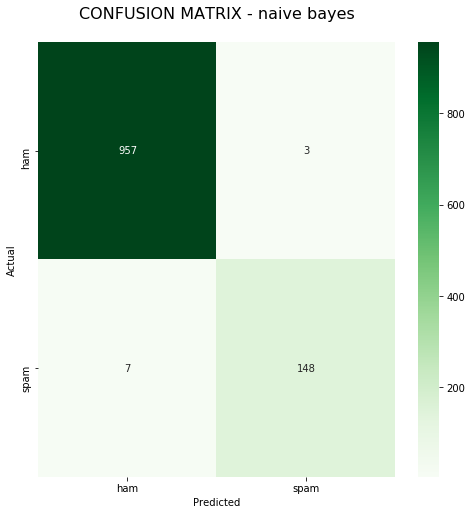

In [17]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Greens", fmt='d',
            xticklabels=['ham','spam'], 
            yticklabels=['ham','spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - naive bayes\n", size=16);

## Logistic Regression
Discriminative model: Logistic regression directly models the posterior probability of P(y|x) by learning the input to output mapping by minimising the error.

Uses logit (logistic unit): y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))
Used to model binary output variables

- Loading dataset
- Visualization
- Preprocessing
- Model creation
- Evaluation

#### Loading the dataset

In [18]:
df = pd.read_csv('data/financial_product_complaints.csv', index_col = 0)

In [19]:
df.head()

,Product,Consumer_complaint
0,"Credit reporting, repair, or other",it is the repeated fraud attempt from experian...
1,Debt collection,"We received multiple voice mails from Weltman,..."
2,Debt collection,Deactivated my car whenever I was a day late m...
3,Student loan,My complaint is regarding my Student Loan Serv...
4,Debt collection,Syndicated Office Systems is currently reporti...


In [20]:
pd.DataFrame(df.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Debt collection
2,Student loan
3,Checking or savings account
4,Mortgage
5,"Payday loan, title loan, or personal loan"
6,Vehicle loan or lease
7,Credit card or prepaid card
8,Bank account or service
9,Consumer Loan


In [21]:
# Create a new column 'category_id' with encoded categories 
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates()


category_id_df

,Product,category_id
0,"Credit reporting, repair, or other",0
1,Debt collection,1
3,Student loan,2
7,Checking or savings account,3
10,Mortgage,4
14,"Payday loan, title loan, or personal loan",5
24,Vehicle loan or lease,6
47,Credit card or prepaid card,7
67,Bank account or service,8
70,Consumer Loan,9


In [22]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df.head()

,Product,Consumer_complaint,category_id
0,"Credit reporting, repair, or other",it is the repeated fraud attempt from experian...,0
1,Debt collection,"We received multiple voice mails from Weltman,...",1
2,Debt collection,Deactivated my car whenever I was a day late m...,1
3,Student loan,My complaint is regarding my Student Loan Serv...,2
4,Debt collection,Syndicated Office Systems is currently reporti...,1


#### Text preprocessing
- convert words to vectors
- use TF-IDF to determine word importance

__TF-IDF__ is the product of the __TF__ and __IDF__ scores of the term.<br><br> $$\text{TF-IDF}=\frac{\text{TF}}{\text{IDF}}$$<br>

__Term Frequency :__ This summarizes how often a given word appears within a document.

$$\text{TF} = \frac{\text{Number of times the term appears in the doc}}{\text{Total number of words in the doc}}$$<br><br>
__Inverse Document Frequency:__ This downscales words that appear a lot across documents. A term has a high IDF score if it appears in a few documents. Conversely, if the term is very common among documents (i.e., “the”, “a”, “is”), the term would have a low IDF score.<br>

$$\text{IDF} = \ln\left(\frac{\text{Number of docs}}{\text{Number docs the term appears in}} \right)$$<br>

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

__n-gram__ is a contiguous sequence of n items from a given sample of text 

__unigrams__ are single words

__bigram__ are double words

In [24]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')

# use tfidf to transform complaints into vectors
features = tfidf.fit_transform(df.Consumer_complaint).toarray()

labels = df.category_id

In [25]:
features.shape

(10000, 28342)

#### A metric that you might use for feature selection is chi-squared 

- The chi-square test measures dependence between stochastic variables
- A "goodness of fit" statistic, because it measures how well the observed distribution of data fits with the distribution that is expected if the variables are independent

In [33]:
from sklearn.feature_selection import chi2

# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):

    #calculate chi2 values for features
    features_chi2 = chi2(features, labels == category_id)
    #select indices of features
    indices = np.argsort(features_chi2[0])
    #get feature names corresponding to those indices
    feature_names = np.array(tfidf.get_feature_names())[indices]

    #for each value in feature, extract uni and bi grams
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]

    #print top N uni and bigrams
    print("\n %s:" %(Product),'\n------------')
    print("  -->Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  -->Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


 Bank account or service: 
------------
  -->Most Correlated Unigrams are: bank, deposit, overdraft
  -->Most Correlated Bigrams are: overdraft fee, checking account, overdraft fees

 Checking or savings account: 
------------
  -->Most Correlated Unigrams are: deposited, checking, overdraft
  -->Most Correlated Bigrams are: debit card, savings account, checking account

 Consumer Loan: 
------------
  -->Most Correlated Unigrams are: dealer, vehicle, car
  -->Most Correlated Bigrams are: credit acceptance, leased vehicle, acceptance corp

 Credit card or prepaid card: 
------------
  -->Most Correlated Unigrams are: express, citi, card
  -->Most Correlated Bigrams are: synchrony bank, american express, credit card

 Credit reporting, repair, or other: 
------------
  -->Most Correlated Unigrams are: experian, report, equifax
  -->Most Correlated Bigrams are: credit bureaus, credit file, credit report

 Debt collection: 
------------
  -->Most Correlated Unigrams are: collect, collect

Before we can train and test a model, the data needs to be split up into train and test subsets. Scikitlearn's train_test_split package is useful for quickly completing this step - it also has parameters that you can alter to suit your data.

- test_size
- random_state


In [27]:
X = df['Consumer_complaint'] # complaint documents
y = df['Product'] # Target labels we want to predict (13 different product types)

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.20)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))

Accuracy score: 0.7525


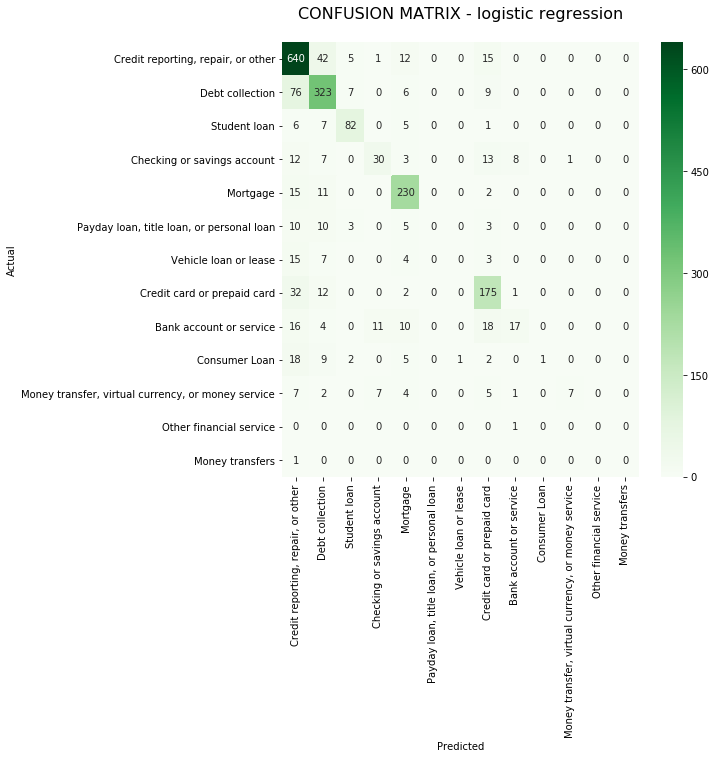

In [31]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Greens", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - logistic regression\n", size=16);